In [1]:
import numpy as np
import numpy.random as npr

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#method to plot cluster
def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));

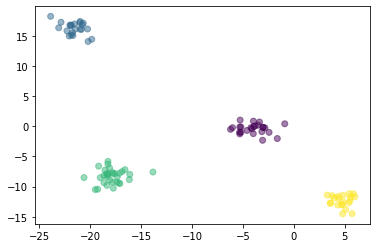

In [3]:
#Fake data X
# make up some fake data

npr.seed(2) 
# above: it's fine to delete this, but you might have to
# re-run things a few times to see the effects of interest

n = 100
d = 2
k_true = 4
W_true = npr.randn(k_true,d)*10
z_true = npr.randint(0,k_true,size=n)
X = np.zeros((n,2))
for i in range(n):
    X[i] = W_true[z_true[i]] + npr.randn(d)

plt.scatter(X[:,0], X[:,1], c=z_true, marker="o", alpha=0.5);

### K-means

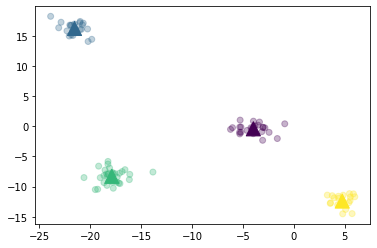

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)